In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('./data/rating.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())
print(n_movies, n_users)

26744 138493


In [5]:
df['rating'].isnull().sum()

0

In [6]:
df['movieId'].isnull().sum()

0

In [7]:
df['userId'].min()

1

In [8]:
df['rating'].min()

0.5

In [9]:
df['rating'].max()

5.0

In [10]:
df['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

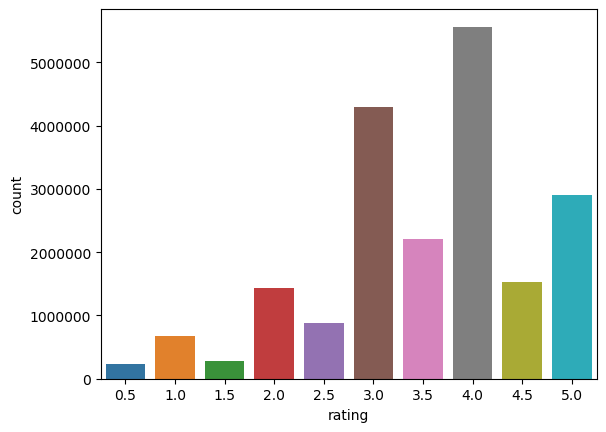

In [11]:
sns.countplot(data=df,x='rating')

In [12]:
l = len(df['movieId'].unique())
m = df['movieId'].max()
print(l,m)

26744 131262


In [14]:
# movie ids are not continuous
uniq_movie_ids = df['movieId'].unique()
idx=1
movie2idx={}
for i in uniq_movie_ids:
    movie2idx[i]=idx
    idx+=1

df['movie_idx']=df.apply(lambda row: movie2idx[row.movieId],axis=1)


In [15]:
l = len(df['movie_idx'].unique())
m = df['movie_idx'].max()
print(l,m)

26744 26744


In [16]:

user_ids_count = Counter(df.userId)
movie_ids_count = Counter(df.movie_idx)

n=700
m=4000

# most_commmon is from Counter object
user_ids = [u for u,c in user_ids_count.most_common(n)]
movie_ids = [m for m,c in movie_ids_count.most_common(m)]

In [17]:
df_small = df[df.userId.isin(user_ids) & df.movie_idx.isin(movie_ids)].copy()

In [18]:
# again need to make userIds and movieIds sequential
new_user_id_map={}
i=1
for old in user_ids:
    new_user_id_map[old]=i
    i+=1
new_movie_id_map={}
j=1
for old in movie_ids:
    new_movie_id_map[old]=j
    j+=1    

In [19]:
df_small.loc[:,'userId'] = df_small.apply(lambda row:new_user_id_map[row.userId],axis=1)
df_small.loc[:,'movie_idx'] = df_small.apply(lambda row:new_movie_id_map[row.movie_idx],axis=1)

In [20]:
userId_max = df_small.userId.max()
movie_idx_max = df_small.movie_idx.max()
print(userId_max,movie_idx_max)

700 4000


In [21]:
df_small.to_csv('./data/very_small_rating.csv')